# Heart disease prediction
#### In this project we will create a model to accurately predict the likelihood of a new patient having heart disease in the future. 

### Leah Itzinger

In [506]:
#imports
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [507]:
# reading in the data
heart=pd.read_csv('heart.csv')

#####  Data Analysis

In [508]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [509]:
heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [510]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [511]:
for x in heart.columns:
    print(x, heart[x].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


In [512]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The mean age of patients is 53.5, and there are no instances of missing values

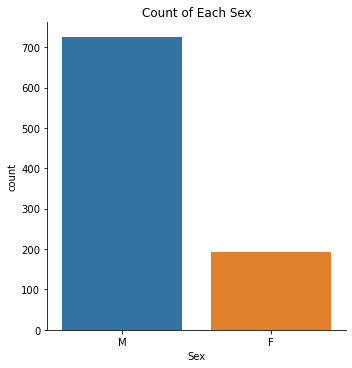

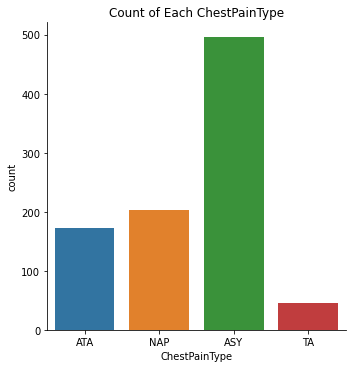

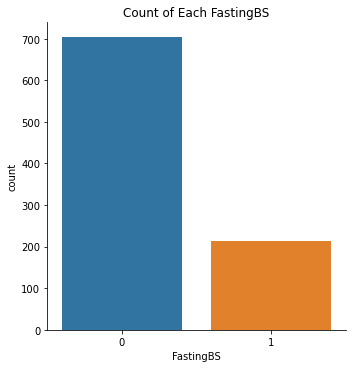

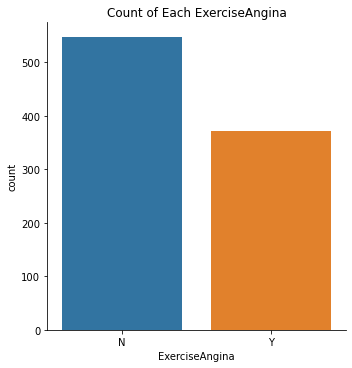

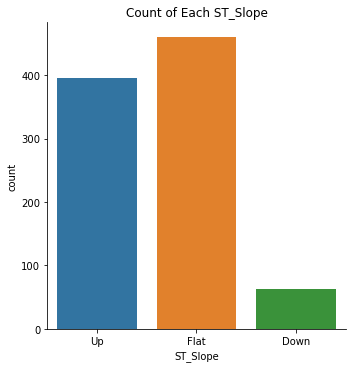

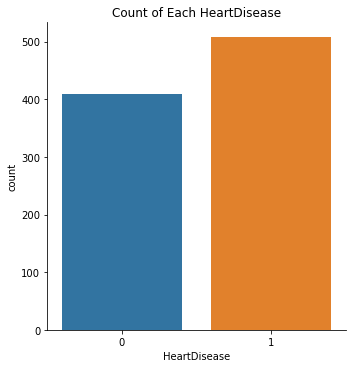

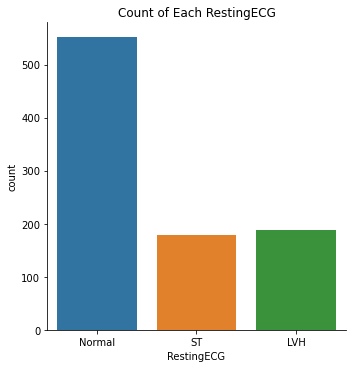

In [513]:
#  bar chart that displays the number of rows for each category of that column
categorical_cols = ['Sex','ChestPainType','FastingBS','ExerciseAngina','ST_Slope','HeartDisease','RestingECG']
for col in categorical_cols:
    sns.catplot(data=heart,x=col,kind='count').set(title='Count of Each '+col)

1. There are many more male patients than female.
2. ASY  is the most common chest pain type with TA being very uncommon.
3. Fasting blood sugar levels are more commonly under 120.
4. More patients get chest pain from excercise than not.
5. A down slope is the least common type.
6. Normal restingECG is the most common type.

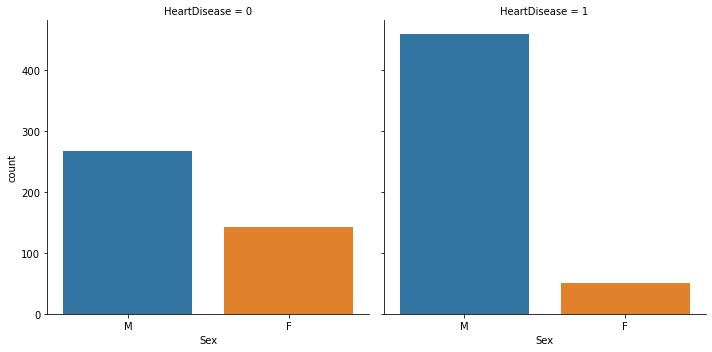

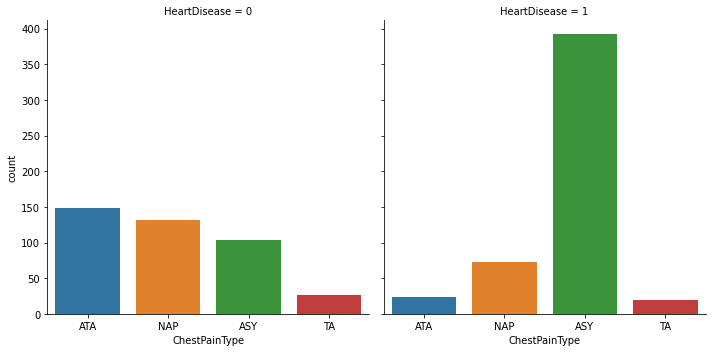

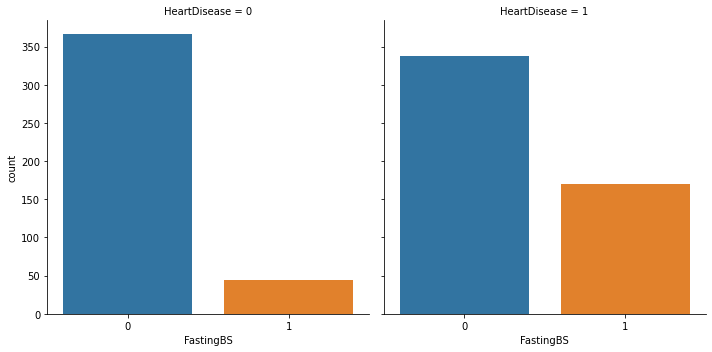

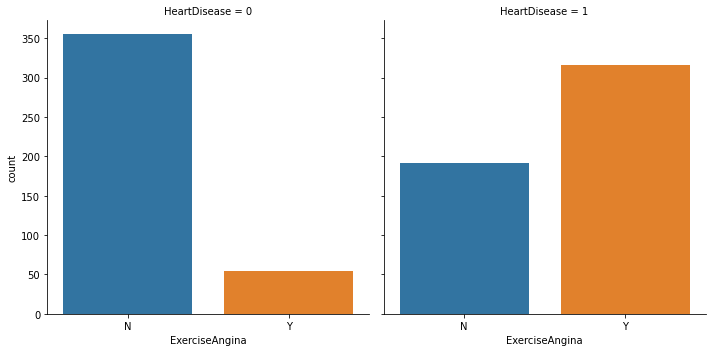

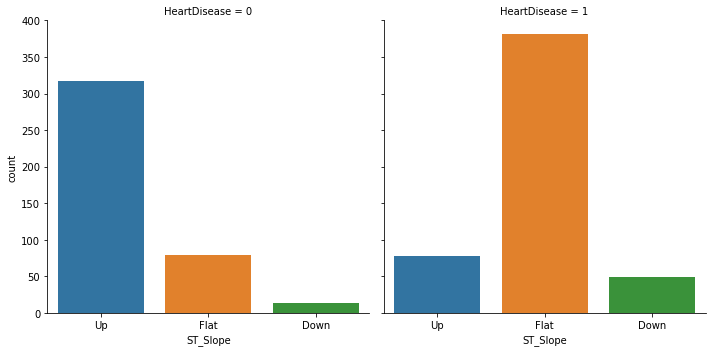

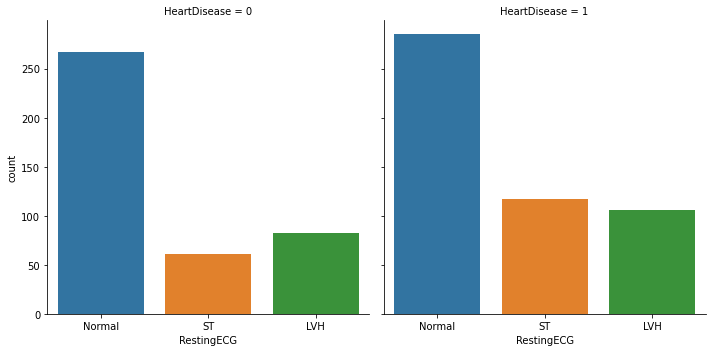

In [514]:
categorical_cols1 = ['Sex','ChestPainType','FastingBS','ExerciseAngina','ST_Slope','RestingECG']
for col in categorical_cols1:
    sns.catplot(data=heart,x=col,kind='count',col='HeartDisease')

1. Hard diseases are proportionally more common by male.
2. ASY  looked like the most common type of chest pain but now we see that people with heart disease have ASY pain.
3. higher sugar levels are an indicator of heart disease
4. Excersize induced chest pain seems to be another indicator of heart disease
5. flat slopes seem to be an indicator of heart disease, while flat slopes seem to be the opposite.

In [515]:

# sns.catplot(data=heart,x='Sex'[heart['Age']>50],kind='count',col='HeartDisease')

In [516]:
#Count of rows that have a 0 value for restingBP
heart['RestingBP'][heart['RestingBP']==0].value_counts()

0    1
Name: RestingBP, dtype: int64

In [517]:
#Count of rows that have a 0 value Cholesterol
heart['Cholesterol'][heart['Cholesterol']==0].value_counts()

0    172
Name: Cholesterol, dtype: int64

In [518]:
#removed one row in the dataset
heart.drop(heart[heart['RestingBP']==0].index,inplace=True)

In [519]:
#Count of rows that have a 0 value Cholesterol
heart['Cholesterol'][heart['Cholesterol']==0].value_counts()

0    171
Name: Cholesterol, dtype: int64

In [520]:
#Getting the means
heart[heart['Cholesterol']!=0].groupby('HeartDisease')['Cholesterol'].median()

HeartDisease
0    231.5
1    246.0
Name: Cholesterol, dtype: float64

In [521]:
#changing the values by the mean
heart.loc[(heart['HeartDisease'] == 0) & (heart['Cholesterol']==0), 'Cholesterol'] = 231
heart.loc[(heart['HeartDisease'] == 1) & (heart['Cholesterol']==0), 'Cholesterol'] = 246


In [522]:
abs(df.corr()).HeartDisease.sort_values()

ChestPainType_TA     0.054591
RestingECG_Normal    0.092452
RestingECG_ST        0.103067
Cholesterol          0.104025
RestingBP            0.117990
ChestPainType_NAP    0.215311
FastingBS            0.267994
Age                  0.282012
Sex_M                0.305118
MaxHR                0.401410
ChestPainType_ATA    0.401680
Oldpeak              0.403638
ExerciseAngina_Y     0.495490
ST_Slope_Flat        0.553700
ST_Slope_Up          0.621843
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

<AxesSubplot:>

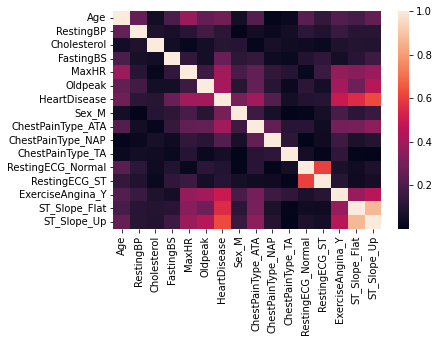

In [523]:
df=pd.get_dummies(heart,drop_first=True)
sns.heatmap(abs(df.corr()))

In [524]:
#Creating feature dataset
X=heart[['Age','Sex','ChestPainType','FastingBS','ST_Slope','ExerciseAngina','Oldpeak']]

Based on the correlation between each column, I made the decision on which columns to exclude and which columns to include.

In [525]:
# Changing to dummy columns
X=pd.get_dummies(X,drop_first=True)

In [526]:
#Creating target dataset
y=heart['HeartDisease']

In [527]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15,random_state=217)

In [528]:
# Scaleing the data
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [529]:
#knn model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
predict=knn.predict(X_test_scaled)
accurecy=accuracy_score(predict,y_test)
print(accurecy)

0.8478260869565217


In [530]:
# Grid search
parameters = {'n_neighbors': range(3, 13, 2), 'weights':['uniform', 'distance']}
clf=GridSearchCV(knn, parameters)
clf.fit(X_train_scaled, y_train)
pred_grid=clf.predict(X_test_scaled)
accuracy_grid= accuracy_score(pred_grid, y_test)
print(accuracy_grid)

0.8405797101449275


In [531]:
clf.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [532]:
clf.best_score_

0.8742266335814722

Despite the usual improvement in accuracy achieved through grid search, the accuracy of this model did not improve. Now, we will proceed to evaluate this model using our test set.